Define these constants:

In [1]:
import os.path

# LOAD_FILES_CAP = 50  # for testing load only some files (loading slow)
LOAD_FILES_CAP = None
# output_root = '/Users/adam/pschool/bakalarka/cryptic_output/output'  # unzipped tree with json outputs
output_root = '/Users/adam/pschool/bakalarka/cryptic_output/output 2'  # unzipped tree with json outputs

In [2]:
import json
from pathlib import Path
from typing import Iterable

import pandas as pd


def load_df(json_files: Iterable[Path]):
    super_df = pd.DataFrame()

    json_files = list(json_files)
    if LOAD_FILES_CAP:
        json_files = list(json_files)[:LOAD_FILES_CAP]  # testing hack

    total_files = len(json_files)

    for i, json_file in enumerate(json_files):
        with json_file.open() as f:
            json_output = json.load(f)

        df = pd.json_normalize(json_output, 'binding_sites', ['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id'])
        super_df = pd.concat([super_df, df], ignore_index=True)

        if i % 10 == 0:
            print(f'\rloading... {i} / {total_files} done', end='')

    return super_df

In [22]:
import pickle

files = Path(output_root).rglob('*.json')

if os.path.exists('df.pickle'):
    # load pickled df
    with open('df.pickle', 'rb') as handle:
        df = pickle.load(handle)
else:
    df = load_df(files)

In [23]:
# je klidne vetsi nez pocet paru, protoze je radek za kazdy ligand, nikoliv pár...
df

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,analyses.method4.apo_bs_blocked_residues__by_blocking_atoms,atom_count_statistic.binding_atoms,atom_count_statistic.binding_atoms_observed_in_apo,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id
0,RFT,[157],0.235313,0.255749,0.255749,108.813930,106.436640,1,1,1,...,1,6,6,6,0,4,6wyg,6wyf,A,A
1,RFT,"[164, 45, 94]",0.577257,0.614879,0.614879,82.939834,85.420435,0,0,0,...,0,3,3,17,0,4,6wyg,6wyh,A,B
2,RFT,[157],0.317696,0.314098,0.314098,108.550272,109.494690,0,0,0,...,0,5,5,6,0,0,6wyg,6wyh,A,B
3,RFT,[157],0.346098,0.366367,0.366367,108.722998,106.436640,0,0,0,...,0,6,6,6,0,4,6wyg,6wyf,C,A
4,RFT,"[164, 45, 94]",0.730723,0.849326,0.849326,87.476912,85.420435,0,0,0,...,0,3,3,17,0,4,6wyg,6wyh,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737105,IXZ,"[217, 116, 35, 81, 304, 221, 219, 33, 79, 226,...",35.815914,35.041840,35.041840,383.087170,397.146905,5,4,5,...,1,35,35,118,103,0,5p3l,3wz6,A,A
1737106,IXY,"[302, 37, 33, 79, 125, 221, 116, 35, 119, 304,...",35.949269,35.866933,35.866933,465.143603,498.159988,19,16,10,...,3,41,41,159,143,0,5p3l,3wz7,A,A
1737107,IXV,"[83, 300, 33, 80, 10, 222, 226, 79, 221, 116, ...",54.334508,54.377497,54.377497,453.171410,445.745519,8,6,7,...,1,36,36,140,121,0,5p3l,3wz8,A,A
1737108,PEG,"[68, 90, 67, 62, 61, 69]",54.554148,54.548213,54.548213,142.983098,131.290774,3,3,3,...,0,13,13,44,41,3,5p3l,3wz8,A,A


In [24]:
print('binding sites', len(df))
print()
print('unique pairs', len(df[['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id']].drop_duplicates()))
print('unique apo chains', len(df[['apo_pdb_code', 'apo_chain_id']].drop_duplicates()))
print('unique holo chains', len(df[['holo_pdb_code', 'holo_chain_id']].drop_duplicates()))
print('unique apo structures', df['apo_pdb_code'].nunique())
print('unique holo structures', df['holo_pdb_code'].nunique())

binding sites 1737110

unique pairs 940786
unique apo chains 28679
unique holo chains 48715
unique apo structures 16041
unique holo structures 27544


## Blocking atoms method

In [25]:
# pro histogram podílu blocked_BS_atoms / BS_atoms

df['blocked_bs_atoms__ratio'] = df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] / df['atom_count_statistic.binding_atoms_observed_in_apo']

df['bs_residue_count'] = df.residue_ids.apply(len)

df['blocked_bs_residues__ratio'] = df['analyses.method4.apo_bs_blocked_residues__by_blocking_atoms'] / df.bs_residue_count


In [7]:
df

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio
0,RFT,[157],0.235313,0.255749,0.255749,108.813930,106.436640,1,1,1,...,6,0,4,6wyg,6wyf,A,A,0.166667,1,1.0
1,RFT,"[164, 45, 94]",0.577257,0.614879,0.614879,82.939834,85.420435,0,0,0,...,17,0,4,6wyg,6wyh,A,B,0.000000,3,0.0
2,RFT,[157],0.317696,0.314098,0.314098,108.550272,109.494690,0,0,0,...,6,0,0,6wyg,6wyh,A,B,0.000000,1,0.0
3,RFT,[157],0.346098,0.366367,0.366367,108.722998,106.436640,0,0,0,...,6,0,4,6wyg,6wyf,C,A,0.000000,1,0.0
4,RFT,"[164, 45, 94]",0.730723,0.849326,0.849326,87.476912,85.420435,0,0,0,...,17,0,4,6wyg,6wyh,C,B,0.000000,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28096,TYS,"[76, 71, 60, 78, 77]",3.668188,3.668188,3.668188,121.703999,0.967510,0,0,0,...,5,0,41,3htc,1way,H,B,0.000000,5,0.0
28097,ASP-PHE-GLU-GLU-ILE-PRO-GLU-GLU-TYS-LEU-HOH-HO...,"[24, 19, 76, 71, 60, 70, 73, 26, 156, 78, 69, ...",4.739663,4.739663,4.739663,345.069321,17.115701,0,0,0,...,15,0,122,3htc,1way,H,B,0.000000,15,0.0
28098,GAH,"[238, 132, 261, 241, 264, 237, 266, 131, 86, 2...",63.895970,63.895970,63.895970,604.029886,60.527826,0,0,0,...,21,0,147,3htc,1xm1,H,A,0.000000,21,0.0
28099,TYS,"[116, 107, 96, 114, 112, 113]",38.630606,38.630606,38.630606,121.703999,0.304608,0,0,0,...,6,0,48,3htc,1xm1,H,A,0.000000,6,0.0


<AxesSubplot:xlabel='blocked_bs_atoms__ratio', ylabel='Proportion'>

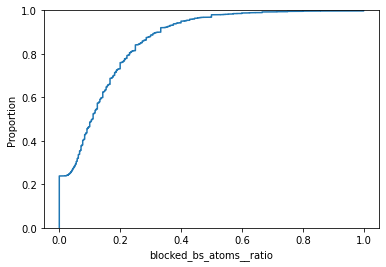

In [26]:
import seaborn as sns

sns.ecdfplot(df, x='blocked_bs_atoms__ratio')

<AxesSubplot:xlabel='blocked_bs_residues__ratio', ylabel='Proportion'>

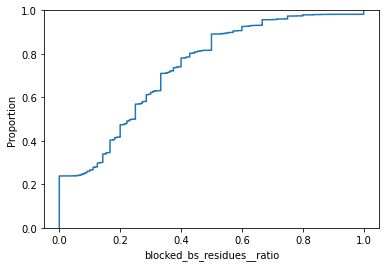

In [27]:
sns.ecdfplot(df, x='blocked_bs_residues__ratio')

### Binding site size

dává smysl, že takto definované cryptic budou mít méně binding atoms v průměru, ale asi to není tak hrozné:

In [51]:
print('median binding site size:', df['atom_count_statistic.binding_atoms'].median())

median binding site size: 15.0


kdyby cryptic := df.blocked_bs_atoms__ratio > 0.4

In [52]:
print('cryptic median binding site size:', df[df.blocked_bs_atoms__ratio > 0.4]['atom_count_statistic.binding_atoms'].median())
print('non-cryptic median binding site size:', df[df.blocked_bs_atoms__ratio <= 0.4]['atom_count_statistic.binding_atoms'].median())


cryptic median binding site size: 9.0
non-cryptic median binding site size: 15.0


kdyby cryptic := df.blocked_bs_atoms__ratio > 0.2

In [55]:
print('cryptic median binding site size:', df[df.blocked_bs_atoms__ratio > 0.2]['atom_count_statistic.binding_atoms'].median())
print('non-cryptic median binding site size:', df[df.blocked_bs_atoms__ratio <= 0.2]['atom_count_statistic.binding_atoms'].median())

cryptic median binding site size: 13.0
non-cryptic median binding site size: 16.0


## Aggregation

Rows are now binding sites. Aggregate them by pair, and by apo chain. As representative rows for each pair/apo_chain use the binding sites most likely to be cryptic, i.e. those with maximal blocked_bs_atoms__ratio.

In [65]:
# aggregated by pair (i.e. a pair has multiple binding sites -> choose max/min/avg from the describing values)
def groupby_and_select(df, column, groupby, min_or_max: str):
    assert min_or_max in ('min', 'max')
    ascending = True if min_or_max == 'min' else False
    return df.sort_values(column, ascending=ascending).drop_duplicates(groupby)

pair_id_columns = ['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id']

min_pairs = groupby_and_select(df, 'blocked_bs_atoms__ratio', pair_id_columns, 'min')
max_pairs = groupby_and_select(df, 'blocked_bs_atoms__ratio', pair_id_columns, 'max')
avg_pairs = df.groupby(pair_id_columns).agg('mean')


# aggregated by apo choin
apo_chain_columns = ['apo_pdb_code', 'apo_chain_id']
min_apo_chains = groupby_and_select(df, 'blocked_bs_atoms__ratio', apo_chain_columns, 'min')
max_apo_chains = groupby_and_select(df, 'blocked_bs_atoms__ratio', apo_chain_columns, 'max')
avg_apo_chains = df.groupby(apo_chain_columns).agg('mean')


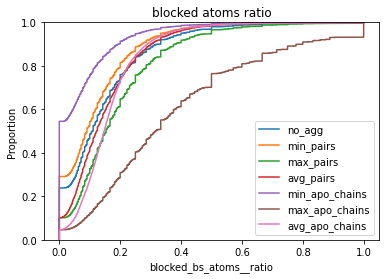

In [75]:
sns.ecdfplot(df, x='blocked_bs_atoms__ratio', label='no_agg')
ax = sns.ecdfplot(min_pairs, x='blocked_bs_atoms__ratio', label='min_pairs')
sns.ecdfplot(max_pairs, x='blocked_bs_atoms__ratio', label='max_pairs')
sns.ecdfplot(avg_pairs, x='blocked_bs_atoms__ratio', label='avg_pairs')

sns.ecdfplot(min_apo_chains, x='blocked_bs_atoms__ratio', label='min_apo_chains')
sns.ecdfplot(max_apo_chains, x='blocked_bs_atoms__ratio', label='max_apo_chains').set_title('blocked atoms ratio')
sns.ecdfplot(avg_apo_chains, x='blocked_bs_atoms__ratio', label='avg_apo_chains')

ax.legend()

# todo taky by slo min_max_chains (min pres binding sites, max pres pairs a obracene treba)

Min pairs = páry, kde za reprezentativní binding site vyberu tu minimální (minimální wrt. blocked atoms ratio)
Max pairs obdobně.
Avg - všechny hodnoty pro všechny binding sites (k danému páru) se vyprůměrují (nemusí dávat smysl)

Min apo chains - apo chainy, za reprezentativní binding site vybírám tu minimální ve všech párech i jejich binding sites

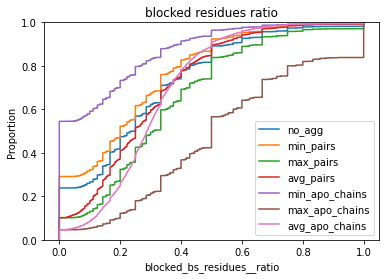

In [76]:
sns.ecdfplot(df, x='blocked_bs_residues__ratio', label='no_agg')
ax = sns.ecdfplot(min_pairs, x='blocked_bs_residues__ratio', label='min_pairs')
sns.ecdfplot(max_pairs, x='blocked_bs_residues__ratio', label='max_pairs')
sns.ecdfplot(avg_pairs, x='blocked_bs_residues__ratio', label='avg_pairs')


sns.ecdfplot(min_apo_chains, x='blocked_bs_residues__ratio', label='min_apo_chains')
sns.ecdfplot(max_apo_chains, x='blocked_bs_residues__ratio', label='max_apo_chains').set_title('blocked residues ratio')
sns.ecdfplot(avg_apo_chains, x='blocked_bs_residues__ratio', label='avg_apo_chains')
ax.legend()


## SASA

<AxesSubplot:xlabel='analyses.method3.bs_atoms_sasa__apo', ylabel='analyses.method3.bs_atoms_sasa__holo'>

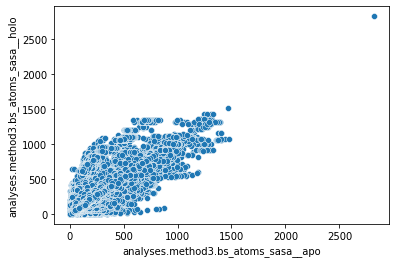

In [72]:
sns.scatterplot(data=df, x='analyses.method3.bs_atoms_sasa__apo', y='analyses.method3.bs_atoms_sasa__holo')


In [31]:


# also compare (on a scatter with BS SASA and the rmsd)
df['sasa_decrease_in_apo']  = (df['analyses.method3.bs_atoms_sasa__holo'] - df['analyses.method3.bs_atoms_sasa__apo']) / df['analyses.method3.bs_atoms_sasa__holo']

df['holo_to_apo_sasa_ratio'] = df['analyses.method3.bs_atoms_sasa__holo'] / df['analyses.method3.bs_atoms_sasa__apo']


## RMSD

Je tam chyba (správné výsledky až při dalším spuštění), hodnoty nedávají smysl.

In [32]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,analyses.method4.apo_bs_blocked_residues,analyses.method4.apo_bs_blocking_atoms,...,atom_count_statistic.binding_atoms,atom_count_statistic.binding_atoms_observed_in_apo,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,holo_to_apo_sasa_ratio
count,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,...,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00,1737110.00
mean,30.58,30.54,30.54,179.68,187.38,9.38,5.45,5.61,3.66,3.09,...,18.67,18.58,65.68,9.47,3.85,0.14,7.32,0.26,0.01,inf
std,40.40,40.43,40.43,107.30,115.16,10.97,5.63,5.61,3.18,3.89,...,12.56,12.50,40.33,24.30,16.73,0.14,4.37,0.23,3.20,nan
min,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,...,1.00,1.00,4.00,0.00,0.00,0.00,1.00,0.00,-3555.80,0.00
25%,4.19,4.05,4.05,113.66,118.11,2.00,2.00,2.00,2.00,1.00,...,11.00,11.00,38.00,0.00,0.00,0.03,5.00,0.08,-0.03,0.97
50%,18.45,18.49,18.49,156.43,158.99,6.00,4.00,4.00,3.00,2.00,...,15.00,15.00,54.00,0.00,0.00,0.11,6.00,0.24,0.01,1.01
75%,42.81,43.11,43.11,211.39,217.40,13.00,7.00,7.00,5.00,4.00,...,22.00,22.00,85.00,0.00,0.00,0.20,9.00,0.40,0.09,1.09
max,983.15,983.05,983.05,2820.10,2824.90,170.00,93.00,96.00,46.00,63.00,...,302.00,302.00,725.00,340.00,358.00,1.00,95.00,1.00,1.00,inf


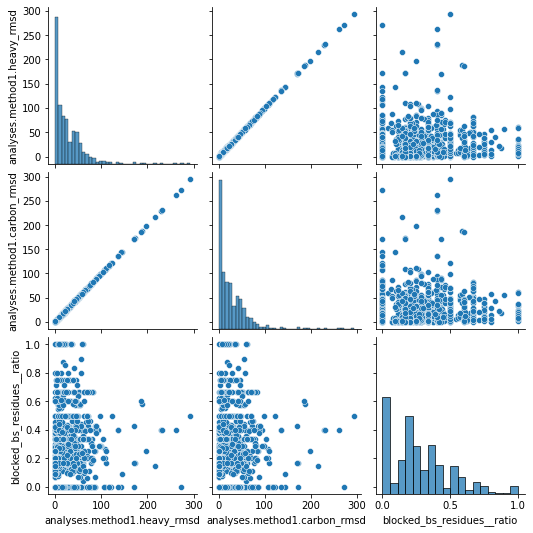

In [34]:
sns.pairplot(df.sample(1000), vars=['analyses.method1.heavy_rmsd', 'analyses.method1.carbon_rmsd', 'blocked_bs_residues__ratio'])

In [40]:
print(len(df))

print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] == 1]))

print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] == 0]))


print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] >= 1]))
print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] > 1]))
print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] <= 1]))

1737110
390418
414725
1322385
931967
805143
